In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 10}) # Set global font size to 18

SAMPLING_PERIOD = 50 * 10**(-3)
TRANSMISSION_RATIO = 8.89
WHEEL_RADIUS = 20.5 * 2.54 / 2 / 100
PI = 3.1415
MS_TO_KPH = 3.6

# Function to pad a dataframe with zeros to a given length
def pad_with_zeros(df, target_len):
    idx = 0
    if len(df) < target_len:
        n_missing = target_len - len(df)
        zero_rows = pd.DataFrame(0, index=range(n_missing), columns=df.columns)
        zero_rows['index'] = range(len(df), len(df) + n_missing)
        
        df = pd.concat([df, zero_rows], ignore_index=True)
    return df

dataset_path = "./data/dados_telemetria/teste_odonto_25_10_2_longer/"

motion_state = pd.read_csv(f'{dataset_path}/76_MOTION_STATE.csv')
torque_ctrl = pd.read_csv(f'{dataset_path}/78_TORQUE_CTRL.csv')
wheel_spd = pd.read_csv(f'{dataset_path}/79_WHEEL_SPD.csv')
left_motor_info_1 = pd.read_csv(f'{dataset_path}/85_LEFT_MOTOR_INFO_1.csv')
left_motor_info_2 = pd.read_csv(f'{dataset_path}/86_LEFT_MOTOR_INFO_2.csv')
left_motor_info_3 = pd.read_csv(f'{dataset_path}/87_LEFT_MOTOR_INFO_3.csv')
left_motor_info_4 = pd.read_csv(f'{dataset_path}/88_LEFT_MOTOR_INFO_4.csv')

right_motor_info_1 = pd.read_csv(f'{dataset_path}/95_RIGHT_MOTOR_INFO_1.csv')
right_motor_info_2 = pd.read_csv(f'{dataset_path}/96_RIGHT_MOTOR_INFO_2.csv')
right_motor_info_3 = pd.read_csv(f'{dataset_path}/97_RIGHT_MOTOR_INFO_3.csv')
right_motor_info_4 = pd.read_csv(f'{dataset_path}/98_RIGHT_MOTOR_INFO_4.csv')

eletrobuild_temperature = pd.read_csv(f'{dataset_path}/261_ELETROBUILD_TEMPERATURE.csv')




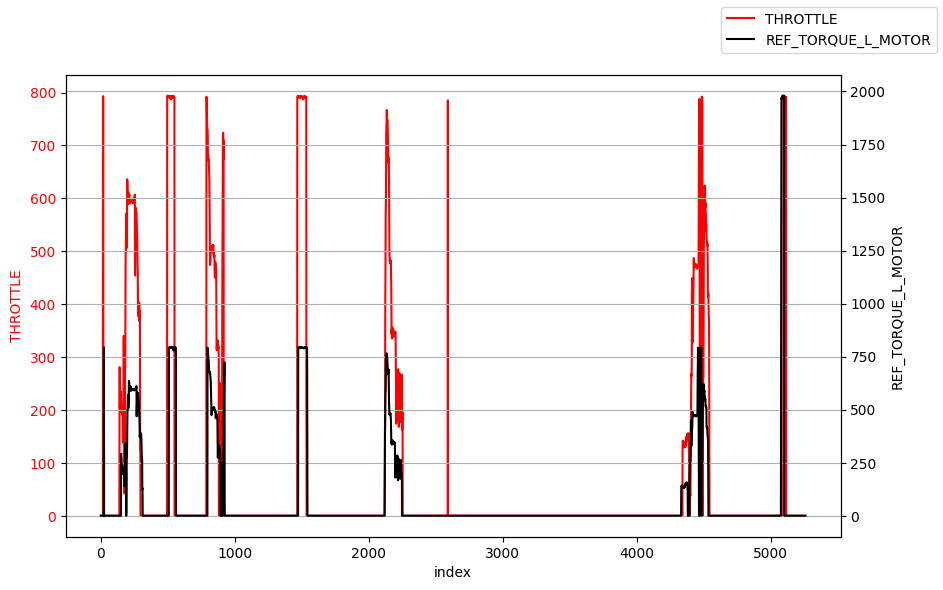

In [2]:
# plota dados raw
plot_range = range(min(len(motion_state['index']), len(torque_ctrl['index'])))
# plot_range = range(3700, 4200)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(motion_state['index'][plot_range], motion_state['THROTTLE'][plot_range], label='THROTTLE', color='red')
ax1.set_xlabel('index')
ax1.set_ylabel('THROTTLE', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax2.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

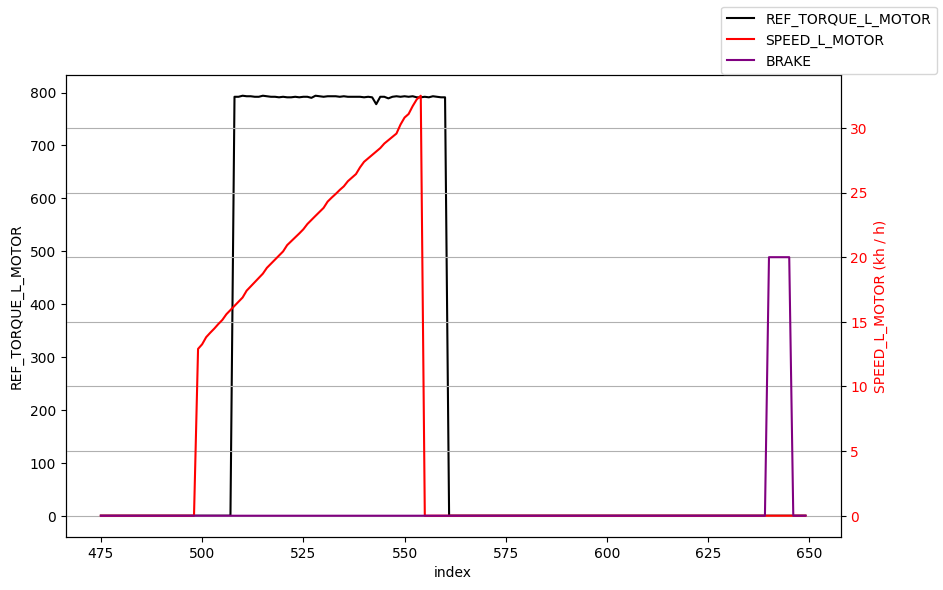

In [3]:
# plota dados raw
# plot_range = range(min(len(left_motor_info_1['index']), len(torque_ctrl['index']), len(motion_state['index'])))
plot_range = range(475, 650)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['index'][plot_range], 
    left_motor_info_1['SPEED_L_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.plot(motion_state['index'][plot_range], motion_state['BRAKE'][plot_range] * 20, label='BRAKE', color='purple')
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

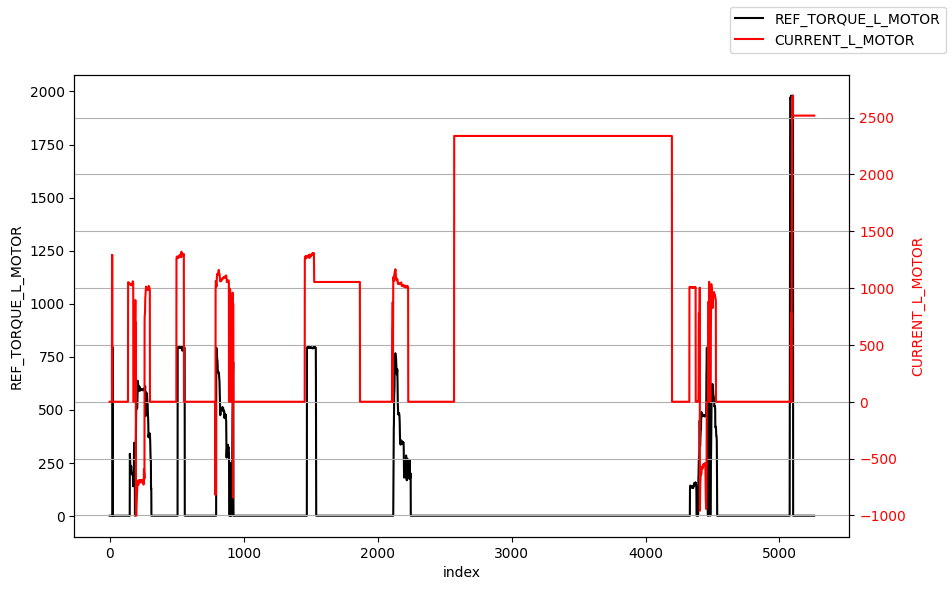

In [4]:
# plota dados raw
plot_range = range(min(len(left_motor_info_1['index']), len(torque_ctrl['index'])))
# plot_range = range(400, 600)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['index'][plot_range], 
    left_motor_info_1['CURRENT_L_MOTOR'][plot_range], 
    label='CURRENT_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('CURRENT_L_MOTOR', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

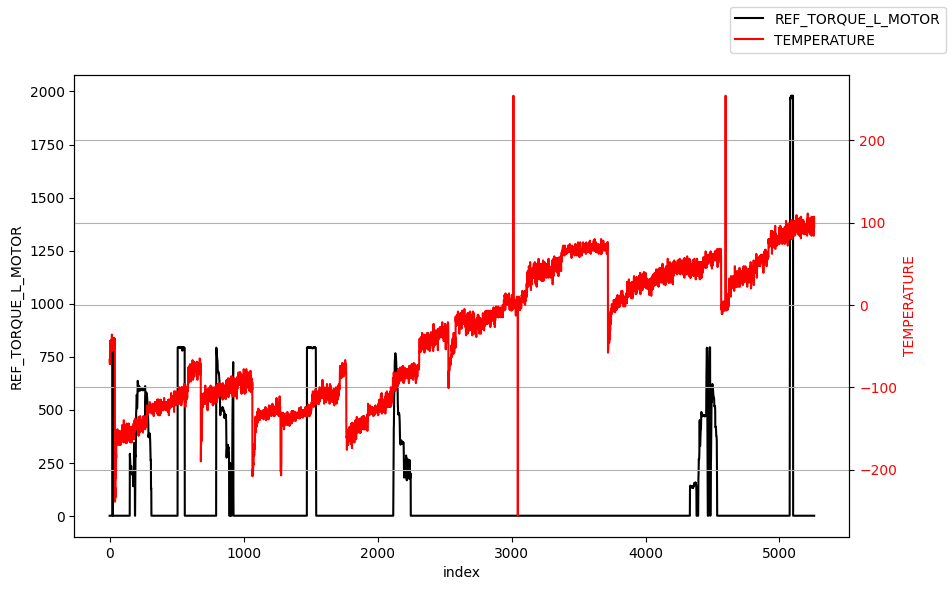

In [5]:
# plota dados raw
plot_range = range(min(len(eletrobuild_temperature['index']), len(torque_ctrl['index'])))
# plot_range = range(3700, 4200)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.plot(torque_ctrl['index'][plot_range], torque_ctrl['REF_TORQUE_L_MOTOR'][plot_range], label='REF_TORQUE_L_MOTOR', color='black')
ax1.set_xlabel('index')
ax1.set_ylabel('REF_TORQUE_L_MOTOR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    eletrobuild_temperature['index'][plot_range], 
    eletrobuild_temperature['TEMPERATURE'][plot_range], 
    label='TEMPERATURE', 
    color='red'
)
ax2.set_ylabel('TEMPERATURE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

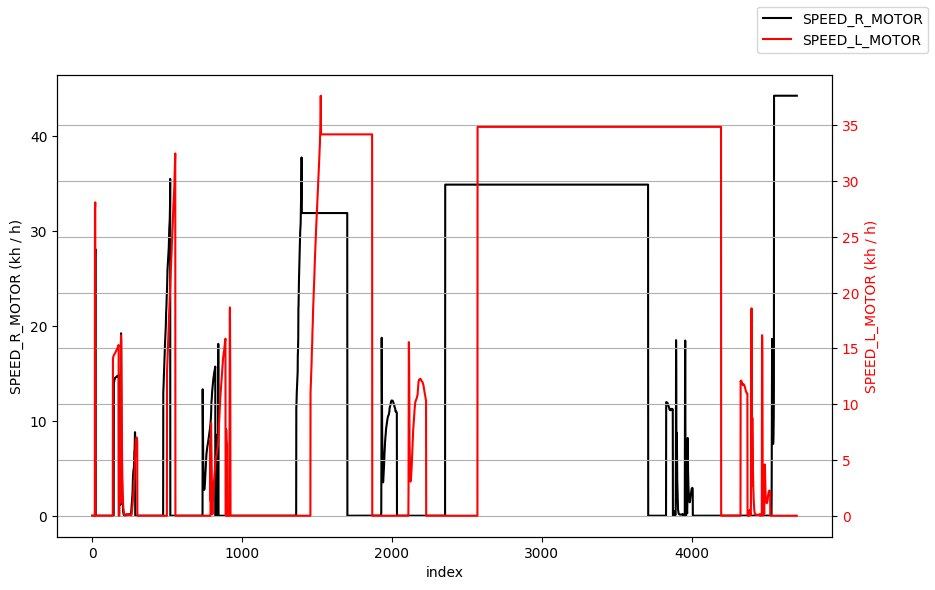

In [6]:
# analise de aceleração / desaceleração
# plota dados raw
plot_range = range(min(len(left_motor_info_1['index']), len(right_motor_info_1['index'])))
# plot_range = range(1350, 1420)

# Create the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot first line on the left y-axis
ax1.set_xlabel('index')

ax1.plot(
    right_motor_info_1['index'][plot_range], 
    right_motor_info_1['SPEED_R_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_R_MOTOR', 
    color='black'
)
ax1.set_ylabel('SPEED_R_MOTOR (kh / h)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot second line on the right y-axis
ax2.plot(
    left_motor_info_1['index'][plot_range], 
    left_motor_info_1['SPEED_L_MOTOR'][plot_range] / TRANSMISSION_RATIO * WHEEL_RADIUS * 2 * PI / 60 * MS_TO_KPH, 
    label='SPEED_L_MOTOR', 
    color='red'
)
ax2.set_ylabel('SPEED_L_MOTOR (kh / h)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()